In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import json

import folium
from folium import plugins
from folium.plugins import HeatMap

In [4]:
PATH = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/DMA2_refine.csv"

In [5]:
df = pd.read_csv(PATH)
df.head(10)

,Parcel lat,Parcel lon,zipcode,supermarket dist,supermarket walking time,grocery dist,grocery walking time,healthcares dist,healthcares walking time,hospitals dist,hospitals walking time,openspaces dist,openspaces walking time
0,42.232335,-71.129743,2136,2993.0,2221.0,860.0,643.0,1718.0,1351.0,3003.0,2268.0,443.0,337.0
1,42.232159,-71.128829,2136,3131.0,2318.0,999.0,740.0,1857.0,1448.0,3141.0,2365.0,1080.0,794.0
2,42.232633,-71.130628,2136,2892.0,2146.0,759.0,568.0,1617.0,1276.0,2902.0,2193.0,352.0,265.0
3,42.232842,-71.129517,2136,2934.0,2175.0,801.0,597.0,1659.0,1305.0,2944.0,2222.0,407.0,307.0
4,42.232839,-71.132042,2136,2802.0,2075.0,669.0,497.0,1527.0,1204.0,2812.0,2121.0,282.0,211.0
5,42.232967,-71.131394,2136,2771.0,2053.0,639.0,475.0,1497.0,1183.0,2781.0,2100.0,251.0,190.0
6,42.233131,-71.132806,2136,2723.0,2014.0,591.0,436.0,1449.0,1144.0,2733.0,2061.0,252.0,188.0
7,42.233261,-71.130077,2136,2811.0,2088.0,679.0,510.0,1537.0,1218.0,2821.0,2135.0,349.0,262.0
8,42.233430,-71.130827,2136,2822.0,2090.0,681.0,508.0,1548.0,1220.0,2832.0,2137.0,272.0,206.0
9,42.233389,-71.129130,2136,2866.0,2126.0,733.0,548.0,1591.0,1256.0,2876.0,2173.0,394.0,298.0


In [ ]:
# test for openspaces
yes = df[df['openspaces walking time'] <= 900]
no = df[df['openspaces walking time'] > 900]

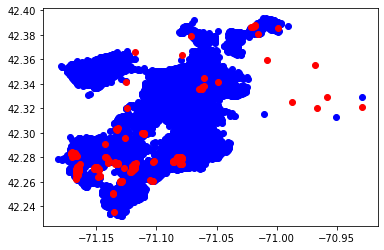

In [ ]:
yes_lats = yes['Parcel lat'].to_list()
yes_lons = yes['Parcel lon'].to_list()
no_lats = no['Parcel lat'].to_list()
no_lons = no['Parcel lon'].to_list()

plt.scatter(yes_lons, yes_lats, c='blue')
plt.scatter(no_lons, no_lats, c='red')
plt.show()

In [ ]:
# below: visualize all

In [6]:
# helper functions
def generateBaseMap(default_location =[42.361145, -71.057083]):
  base_map = folium.Map( location=default_location)
  return base_map

def show_on_map(name, yes_lats, yes_lons, no_lats, no_lons, c_yes, c_no):
  """ show the clusterings on map and save as html"""
  """ name: the html file name, a string"""
  """ df: the pandas dataframe"""
  """ c: the color"""
  base_map = generateBaseMap()
  for i in range(len(yes_lats)): # in 15-min
    lat = yes_lats[i]
    lon = yes_lons[i]
    folium.CircleMarker([lat, lon], radius=5, color=c_yes, fill=True, fill_color=c_yes, fill_opacity=0.9).add_to(base_map)
  for i in range(len(no_lats)): # not in 15 min
    lat = no_lats[i]
    lon = no_lons[i]
    folium.CircleMarker([lat, lon], radius=5, color=c_no, fill=True, fill_color=c_no, fill_opacity=0.9).add_to(base_map)
  base_map.save(name)


supermarket
percentage of parcels that are not covered is 0.46010212636231995


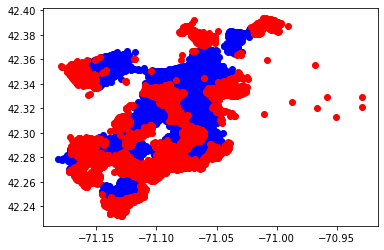

grocery
percentage of parcels that are not covered is 0.025455376876762442


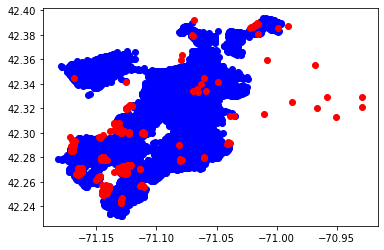

healthcare
percentage of parcels that are not covered is 0.022559256154256534


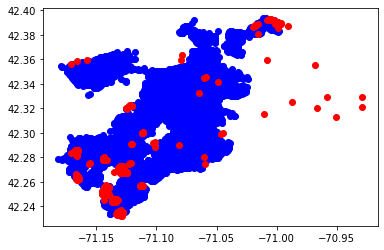

hospital
percentage of parcels that are not covered is 0.46071183598811066


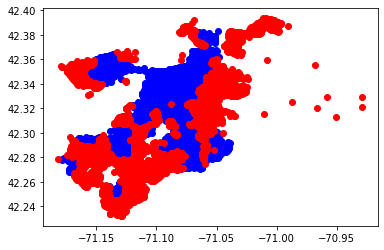

park_and_open_space
percentage of parcels that are not covered is 0.015395168051215609


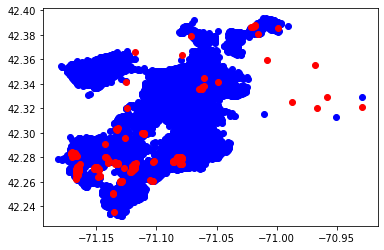

In [ ]:
# show things on map
walking_times = ['supermarket walking time', 'grocery walking time', 'healthcares walking time', 'hospitals walking time', 'openspaces walking time']
services = ['supermarket', 'grocery', 'healthcare', 'hospital', 'park_and_open_space']

for i in range(len(walking_times)):
  print(services[i])
  yes = df[df[ walking_times[i] ] <= 900]
  no = df[df[ walking_times[i] ] > 900]
  yes_lats = yes['Parcel lat'].to_list()
  yes_lons = yes['Parcel lon'].to_list()
  no_lats = no['Parcel lat'].to_list()
  no_lons = no['Parcel lon'].to_list()

  yes_num = len(yes_lats)
  no_num = len(no_lats)
  no_percentage = no_num / (yes_num + no_num)
  print("percentage of parcels that are not covered is "+str(no_percentage))

  plt.scatter(yes_lons, yes_lats, c='blue')
  plt.scatter(no_lons, no_lats, c='red')
  plt.show()

  address = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/"+services[i]+".html"
  show_on_map(address, yes_lats, yes_lons, no_lats, no_lons, 'blue', 'red')

percentage of parcels that are not covered is 0.001066991845133755


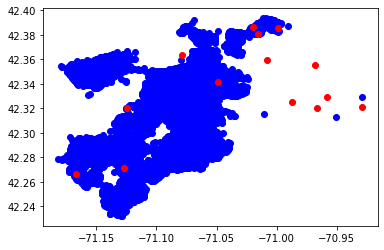

In [7]:
# for those covered by at least 1 kind of services
def check_one(a, b, c, d, e):
  if a <= 900 or b <= 900 or c <= 900 or d <= 900 or e <= 900:
    return True
  return False 

total_num = df.shape[0] # 13121
yes = df[df.apply(lambda row: check_one(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == True]
no = df[df.apply(lambda row: check_one(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == False]
not_num = no.shape[0]
no_percentage = not_num / total_num
print("percentage of parcels that are not covered is "+str(no_percentage))

yes_lats = yes['Parcel lat'].to_list()
yes_lons = yes['Parcel lon'].to_list()
no_lats = no['Parcel lat'].to_list()
no_lons = no['Parcel lon'].to_list()

plt.scatter(yes_lons, yes_lats, c='blue')
plt.scatter(no_lons, no_lats, c='red')
plt.show()

address = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/"+"has1"+".html"
show_on_map(address, yes_lats, yes_lons, no_lats, no_lons, 'blue', 'red')

percentage of parcels that are not covered is 0.009755354012651474


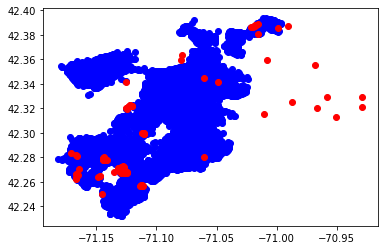

In [8]:
# for those covered by at least 2 kinds of services
def check_two(a, b, c, d, e):
  temp = [a, b, c, d, e]
  temp.sort()
  if temp[1] <= 900: # the second farthest
    return True
  return False 

total_num = df.shape[0] # 13121
yes = df[df.apply(lambda row: check_two(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == True]
no = df[df.apply(lambda row: check_two(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == False]
not_num = no.shape[0]
no_percentage = not_num / total_num
print("percentage of parcels that are not covered is "+str(no_percentage))

yes_lats = yes['Parcel lat'].to_list()
yes_lons = yes['Parcel lon'].to_list()
no_lats = no['Parcel lat'].to_list()
no_lons = no['Parcel lon'].to_list()

plt.scatter(yes_lons, yes_lats, c='blue')
plt.scatter(no_lons, no_lats, c='red')
plt.show()

address = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/"+"has2"+".html"
show_on_map(address, yes_lats, yes_lons, no_lats, no_lons, 'blue', 'red')

percentage of parcels that are not covered is 0.03726850087645759


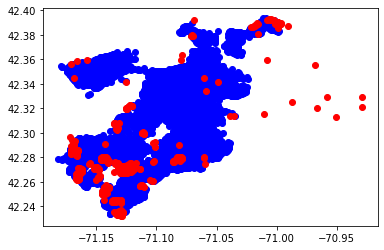

In [9]:
# for those covered by at least 3 kinds of services
def check_3(a, b, c, d, e):
  temp = [a, b, c, d, e]
  temp.sort()
  if temp[2] <= 900: # the second farthest
    return True
  return False 

total_num = df.shape[0] # 13121
yes = df[df.apply(lambda row: check_3(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == True]
no = df[df.apply(lambda row: check_3(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == False]
not_num = no.shape[0]
no_percentage = not_num / total_num
print("percentage of parcels that are not covered is "+str(no_percentage))

yes_lats = yes['Parcel lat'].to_list()
yes_lons = yes['Parcel lon'].to_list()
no_lats = no['Parcel lat'].to_list()
no_lons = no['Parcel lon'].to_list()

plt.scatter(yes_lons, yes_lats, c='blue')
plt.scatter(no_lons, no_lats, c='red')
plt.show()

address = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/"+"has3"+".html"
show_on_map(address, yes_lats, yes_lons, no_lats, no_lons, 'blue', 'red')

percentage of parcels that are not covered is 0.29753829738586995


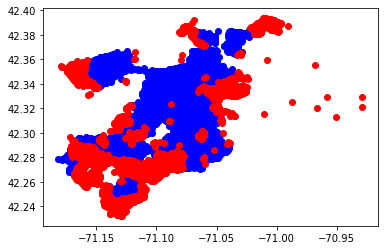

In [10]:
# for those covered by at least 4 kinds of services
def check_4(a, b, c, d, e):
  temp = [a, b, c, d, e]
  temp.sort()
  if temp[3] <= 900: # the second farthest
    return True
  return False  

total_num = df.shape[0] # 13121
yes = df[df.apply(lambda row: check_4(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == True]
no = df[df.apply(lambda row: check_4(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == False]
not_num = no.shape[0]
no_percentage = not_num / total_num
print("percentage of parcels that are not covered is "+str(no_percentage))

yes_lats = yes['Parcel lat'].to_list()
yes_lons = yes['Parcel lon'].to_list()
no_lats = no['Parcel lat'].to_list()
no_lons = no['Parcel lon'].to_list()

plt.scatter(yes_lons, yes_lats, c='blue')
plt.scatter(no_lons, no_lats, c='red')
plt.show()

address = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/"+"has4"+".html"
show_on_map(address, yes_lats, yes_lons, no_lats, no_lons, 'blue', 'red')

percentage of parcels that are not covered is 0.6385946193125523


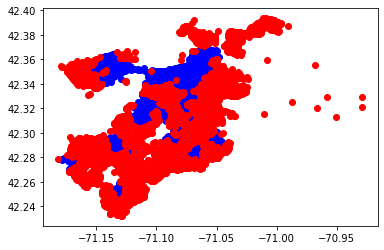

In [11]:
# for those covered by at least 5 kinds of services
def check_5(a, b, c, d, e):
  temp = [a, b, c, d, e]
  temp.sort()
  if temp[4] <= 900: # the second farthest
    return True
  return False 

total_num = df.shape[0] # 13121
yes = df[df.apply(lambda row: check_5(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == True]
no = df[df.apply(lambda row: check_5(row['supermarket walking time'], row['grocery walking time'], row['healthcares walking time'], row['hospitals walking time'], row['openspaces walking time']), axis=1) == False]
not_num = no.shape[0]
no_percentage = not_num / total_num
print("percentage of parcels that are not covered is "+str(no_percentage))

yes_lats = yes['Parcel lat'].to_list()
yes_lons = yes['Parcel lon'].to_list()
no_lats = no['Parcel lat'].to_list()
no_lons = no['Parcel lon'].to_list()

plt.scatter(yes_lons, yes_lats, c='blue')
plt.scatter(no_lons, no_lats, c='red')
plt.show()

address = "/content/gdrive/My Drive/Colab Notebooks/CS506FinalProject/"+"has5"+".html"
show_on_map(address, yes_lats, yes_lons, no_lats, no_lons, 'blue', 'red')